# MNIST (dígitos) solución tradicional

__Integrantes:__

+ Nombre: Jorge Antonio Morales Flórez
+ Nombre: Alejandro Narvaez

__Números asignados:__ 3


## Taller 

_Suponga que trabajan para el desarrollo de un sistema de lectura y reconocimiento de dígitos. Para este trabajo le han proporcionado un conjunto de fotos en grises con el fin que proponga una solución de programación tradicional, es decir, sin el uso de la inteligencia artificial. El software que proponga debe tener la capacidad de determinar con una precisión una muestra de los datos que le han suministrado_

Durante la clase se le proporcionaran dos números para trabajar:
+ 1 y 5
+ 8 y 2
+ 9 y 7
+ 0 y 3
+ 4 y 6

**Evaluación del método**

Seleccione aleatoriamente una muestra de 30% de los datos, en donde se incluya un balance entre los dígitos asignados (despliéguelo y evidencie las cantidades).

Utilice la muestra obtenida y evalué el software (proceso o métodos) que ha propuesto, es decir, a cuantos números acertó (VP) contra los que no acertó (FP), calcule los siguientes datos:

```
Para el primer número

Reales =  número de datos

Estimados = cantidad de dígitos estimados correctamente 

Para el segundo número

Reales =  número de datos

Estimados = cantidad de dígitos estimados correctamente
```
_Para todos los números que le corresponden_

$ Precision = \frac{VP}{VP+FP}$


Finalmente, despliegue el tiempo que tomo todo el proceso de evaluación.

#### Entregas

+ Prepare una presentación donde muestre los resultados
+ Envié por un correo electrónico este archivo ipynb con la solución y resultados conseguidos


#### Paquetes

In [6]:
from sklearn.datasets import load_digits
import pylab as pl
import sklearn

In [7]:
# cargamos los datos y desplegamos el objeto
digits = load_digits()
type(digits)

sklearn.utils.Bunch

In [8]:
# observe las propieades del objeto, ¿a que tipo se le parece?
?sklearn.utils.Bunch

Se tienen en total: 1797 imágenes
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]


<Figure size 432x288 with 0 Axes>

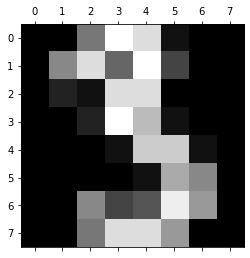

In [21]:
pl.gray() # Queremos las imágenes en grises
pl.matshow(digits.images[3]) # Imprimir una imagen dada
numImagenes = len(digits.images) # Numero de imagenes, len es un método que provee el tamaño del arreglo
print("Se tienen en total:", numImagenes, "imágenes")
print(digits.images[3]) # Ver su representación en pixeles

Observe cada atributo del objeto digits, recorra cada imagen y obtenga su representación (_target_)

#### Solución

## 1. Definir muestras del 30% de la población de números tres y ceros

In [105]:
def totalTres() :
    list = []
    counter = 0
    for i in digits.target :
        if(i == 3) :
            list.append(counter)
        counter+=1
    return list

def muestraTres():
    list = []
    counter = 0
    for i in digits.target :
        if(i == 3) :
            list.append(counter)
        counter+=1
    newList = list[0 : int(len(list)*0.3)]
    return newList

def muestraCero() :
    list = []
    counter = 0
    for i in digits.target :
        if(i == 0) :
            list.append(counter)
        counter+=1
    newList = list[0 : int(len(list)*0.3)]
    return newList

print ('Arreglo de posiciones del número tres:\n')
print (muestraTres())
print()
print ('Arreglo de posiciones del número cero:\n')
print (muestraCero())

Arreglo de posiciones del número tres:

[3, 13, 23, 45, 59, 60, 62, 63, 83, 89, 91, 98, 103, 133, 143, 153, 175, 189, 190, 192, 193, 213, 217, 219, 226, 231, 259, 269, 279, 301, 315, 316, 318, 319, 339, 345, 347, 354, 359, 385, 389, 399, 409, 431, 445, 446, 448, 449, 469, 475, 477, 484, 489, 519]

Arreglo de posiciones del número cero:

[0, 10, 20, 30, 36, 48, 49, 55, 72, 78, 79, 101, 126, 130, 140, 150, 160, 166, 178, 179, 185, 202, 208, 209, 229, 252, 256, 266, 276, 286, 292, 304, 305, 311, 328, 334, 335, 357, 382, 386, 396, 406, 416, 422, 434, 435, 441, 458, 464, 465, 487, 512, 516]


## 2. Desarrollo de los métodos encargados de validar las muestras y decidir si el número dado es un tres o un cero

In [108]:
def metodoNumTres(matriz) :
    contador = 0
    resultado = False
    if((matriz[0][1] + matriz[0][6]) <= 6):
        contador = contador + 1
    if((matriz[1][1] + matriz[1][6]) <= 7):
        contador = contador + 1
    if((matriz[2][1] + matriz[2][2] + matriz[2][6]) <= 10):
        contador = contador + 1
    if((matriz[3][1] + matriz[3][2] + matriz[3][6]) <= 10):
        contador = contador + 1
    if((matriz[4][1] + matriz[4][2] + matriz[4][3]) <= 7):
        contador = contador + 1
    if((matriz[5][1] + matriz[5][2] + matriz[5][3]) + matriz[5][4] <= 3):
        contador = contador + 1
    if((matriz[6][1]) <= 5):
        contador = contador + 1
    if((matriz[7][1] + matriz[7][6]) <= 6):
        contador = contador + 1

    if(contador >= 7):
        resultado = True
    return resultado
        
def metodoNumCero(arreglo) :
    print ('Ipa & Paola')


#### Resultados para el número 3 (muestra del 30%)

In [109]:
VP = 0
VF = 0
for i in muestraTres() :
    if(metodoNumTres(digits.images[i]) == True):
        VP = VP + 1
    else :
        VF = VF + 1
print('VP : {}'.format(VP))
print('VF : {}'.format(VF))
print('Reales : {}'.format(len(muestraTres())))
print('Precisión : {0:.2f} %'.format((VP/(VP+VF))*100))

VP : 27
VF : 27
Reales : 54
Precisión : 50.00 %


#### Resultados para el número 3 (100% de los números Tres)

In [110]:
VP = 0
VF = 0
for i in totalTres() :
    if(metodoNumTres(digits.images[i]) == True):
        VP = VP + 1
    else :
        VF = VF + 1
print('VP : {}'.format(VP))
print('VF : {}'.format(VF))
print('Reales : {}'.format(len(totalTres())))
print('Precisión : {0:.2f} %'.format((VP/(VP+VF))*100))

VP : 83
VF : 100
Reales : 183
Precisión : 45.36 %


#### Resultados para el número 3 (todos los datos)

In [125]:
def pertenece(numero) :
    for i in totalTres() :
        if(i == numero) :
            return True
    return False

VP = 0
VF = 0
for i in range(0, len(digits.images)) :
    if(pertenece(i)) :
        if(metodoNumTres(digits.images[i]) == True):
            VP = VP + 1
        else :
            VF = VF + 1
    else :
        if(metodoNumTres(digits.images[i]) == True):
            VF = VF + 1
        else :
            VP = VP + 1
print('VP : {}'.format(VP))
print('VF : {}'.format(VF))
print('Reales : {}'.format(len(digits.images)))
print('Precisión : {0:.2f} %'.format((VP/(VP+VF))*100))

VP : 1664
VF : 133
Reales : 1797
Precisión : 92.60 %
